In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
df=pd.read_csv(r"",converters={'':str})

In [1]:
df

In [2]:
df.columns=[]

In [3]:
df.shape

In [7]:
#Preprocessing
#1) Delete blank spaces
df['']=df[''].apply( lambda x: x.strip() if isinstance(x, str) else x )
df['']=df[''].apply( lambda x: x.strip() if isinstance(x, str) else x )
df['']=df[''].apply( lambda x: x.strip() if isinstance(x, str) else x )
#2) Capital letters
df['']=df[''].apply( lambda x: x.upper() if isinstance(x, str) else x )
df['']=df[''].apply( lambda x: x.upper() if isinstance(x, str) else x )
df['']=df[''].apply( lambda x: x.upper() if isinstance(x, str) else x )

In [4]:
base=list(df[''].unique())+list(df[''].unique())+list(df[''].unique())
base=list(set(base))
base=pd.DataFrame(base,columns=['Cadena'])
base.head()

## Counting of appearence

In [9]:
#Counting of lastnames and firstnames
lastname=df.groupby('').nunique().sort_values('').reset_index()[['','']]
lastnamf=df.groupby('').nunique().sort_values('').reset_index()[['','']]
names=df.groupby('').nunique().sort_values('').reset_index()[['','']]

In [5]:
lastname.head(13436)

In [11]:
#Rename columns
lastname.columns=['','']
lastnamf.columns=['','']
names.columns=['','']

## Frequency of appearence

In [7]:
lastname['']=lastname['']/lastname[''].sum()
lastnamf['']=lastnamf['']/lastnamf[''].sum()
names['']=names['']/names[''].sum()

## Apriori probability of being a name or last name

In [13]:
#Merging counts for every name
base=pd.merge(base,lastname[['','','']],how='left',left_on='Cadena',right_on='')
base=pd.merge(base,lastnamf[['','','']],how='left',left_on='Cadena',right_on='')
base=pd.merge(base,names[['','','']],how='left',left_on='Cadena',right_on='')

In [8]:
base.fillna(0,inplace=True)
base

In [ ]:
#Counting names
base=base[[]].copy()
base['']=base['']+base['']
base.head()

In [16]:
base.fillna(0,inplace=True)

In [17]:
base['proba_firstname']=base['']/(base['']+base['']+base[''])
base['proba_lastname']=(base['']+base[''])/(base['']+base['']+base[''])

In [ ]:
base.loc[(base['']+base['']+base['']<5) & ((base['']+base['']+base['']>0) ), ''] = 0.5
base.loc[(base['']+base['']+base['']<5) & ((base['']+base['']+base['']>0) ), ''] = 0.5

In [9]:
base

In [20]:
base.fillna(0,inplace=True)

In [21]:
final=base[[]]

## We calculate our probability

In [10]:
df[''].loc[0]

In [13]:
final[final['']=='']

In [14]:
#final[final['Cadena']==df[''].loc[0]]

In [24]:
subfinal=pd.merge(df,final[[]],how='left',left_on='',right_on='Cadena').copy()
subfinal=pd.merge(subfinal,final[[]],how='left',left_on='',right_on='Cadena').copy()
subfinal=pd.merge(subfinal,final[[]],how='left',left_on='',right_on='Cadena')

In [15]:
#subfinal.head(5)

In [27]:
#subfinal.columns

Index(['cve', 'nom', 'ApPaterno', 'ApMaterno', 'Nombres', 'Status', 'Cadena_x',
       'proba_firstname_x', 'proba_lastname_x', 'Cadena_y',
       'proba_firstname_y', 'proba_lastname_y', 'Cadena', 'proba_firstname',
       'proba_lastname'],
      dtype='object')

In [16]:
subfinal.columns=[]

## We use

$P$($C$|$A$,$B$) $\approx$ $P$($A$|$C$)*$P$($B$|$C$)*$P$($C$)

Given that $P$($C$)$=1$ 

In [29]:
subfinal['']=subfinal['']*subfinal['']

In [17]:
subfinal

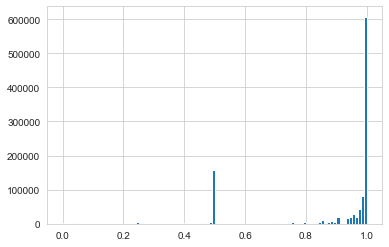

In [33]:
plt.hist(subfinal[''],bins=100)
plt.show()

In [18]:
#subfinal[subfinal['']<0.05][:50]

In [36]:
val=[]
for i in np.linspace(0,1,101):
    val.append(len(subfinal[subfinal['']<i][''].unique())/(len(subfinal)))

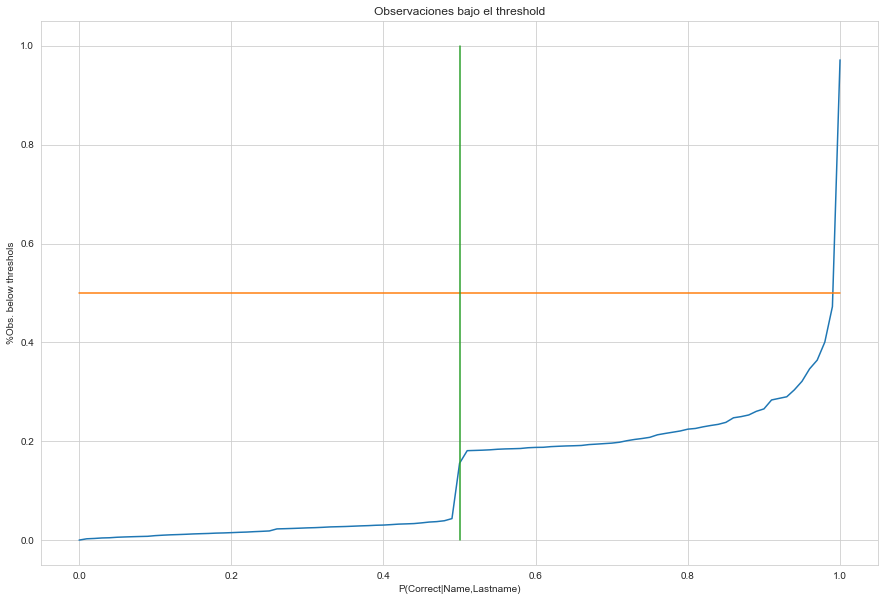

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(np.linspace(0,1,101),val)#,title='Observaciones bajo threshold')
ax.plot(np.linspace(0,1,101),[0.5]*101)
ax.plot([0.5]*101,np.linspace(0,1,101))
ax.set_title('Observaciones bajo el threshold')
ax.set(xlabel='P(Correct|Name,Lastname)', ylabel='%Obs. below threshols')
plt.show()

# Labeling

In [38]:
subfinal['label']=subfinal[''].apply(lambda x: "Incorrect" if x<0.02 else "Correct")

In [19]:
subfinal[subfinal['label']=='Incorrect'][100:150]

## Update of our table

# Correction

In [71]:
corr=subfinal[subfinal['label']=='Incorrect'].copy().reset_index()

In [20]:
corr.head(5)

In [74]:
#Correction
names,appaterno,apmaterno=[],[],[]
for i in range(len(corr)):
    names.append(corr.loc[i][''])
    appaterno.append(corr.loc[i][''])
    apmaterno.append(corr.loc[i][''])

In [75]:
corregido=pd.DataFrame(names)
corregido.columns=['']
corregido['']=appaterno
corregido['']=apmaterno

In [76]:
corregido['']=corr['']

In [21]:
corregido.columns

In [78]:
corregido.columns=[]

In [22]:
corregido.shape

In [23]:
corr

In [84]:
corregido['']=corr['']
corregido['']=corr['']
corregido['']=corr['']

In [24]:
corregido

In [25]:
corregido.to_excel(r"")

## Llenados de Vacios

In [26]:
empty=pd.read_excel(r"",converters={'cve':str})

In [27]:
empty.head(10)

In [28]:
empty.shape

In [183]:
nombres_test=list(empty[''].apply(lambda x : x.strip().upper().split(' ')))

In [213]:
nombres=nombres_test.copy()

In [ ]:
nomb,apellidoP,apellidoM=[],[],[]
import time
start=time.time()
for i in range(len(nombres)):
    if len(base[base['Cadena']==nombres[i][0]])!=0:
        if len(nombres[i])==3:

            if list(base[base['Cadena']==nombres[i][0]]['proba_firstname']>base[base['Cadena']==nombres[i][0]]['proba_lastname'])[0]:
                nomb.append(nombres[i][0])
                apellidoP.append(nombres[i][1])
                apellidoM.append(nombres[i][2])
            else:
                nomb.append(nombres[i][2])
                apellidoP.append(nombres[i][0])
                apellidoM.append(nombres[i][1])
        if len(nombres[i])==4:
            if list(base[base['Cadena']==nombres[i][0]]['proba_firstname']>base[base['Cadena']==nombres[i][0]]['proba_lastname'])[0]:
                nomb.append(nombres[i][0]+' '+nombres[i][1])
                apellidoP.append(nombres[i][2])
                apellidoM.append(nombres[i][3])
            else:
                nomb.append(nombres[i][2]+' '+nombres[i][3])
                apellidoP.append(nombres[i][0])
                apellidoM.append(nombres[i][1])

        if (len(nombres[i])>4) | (len(nombres[i])<3):
            nomb.append('')
            apellidoP.append('')
            apellidoM.append('')
        if i%1000==0:
            print(i," ",time.time()-start)
    else:
        nomb.append('')
        apellidoP.append('')
        apellidoM.append('')
print(time.time()-start)

In [227]:
new=pd.DataFrame(nomb)

In [230]:
new.columns=['']
new['']=apellidoP
new['']=apellidoM

In [233]:
new['']=empty['']
new['']=empty['']

In [29]:
new[new['']!='']